In [1]:
import lightgbm as lgb
import re
import colorgram
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd
import colorsys
from colorthief import ColorThief

E:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [25]:
data=pd.read_csv('./filtered_tech.csv')
data.head()

,207,169,193,153,80,186,139,132,117,41,201,205,154,158,121,technology
0,182,79,55,42,21,188,209,134,98,42,216,241,201,152,67,technology
1,191,83,39,22,5,233,171,121,83,30,240,202,168,123,51,technology
2,173,95,52,84,15,238,175,105,107,28,247,233,183,140,52,technology
3,233,198,183,196,147,235,233,223,196,211,235,238,236,217,225,technology
4,232,143,180,28,152,229,204,129,206,91,228,198,95,181,70,technology


In [21]:
gbm=lgb.Booster(model_file='./model_withFilter.txt')

In [17]:
# param: palette,eg:[(r,g,b),(r,g,b),(r,g,b),(r,g,b),(r,g,b)]
# return style ['cute','fresh','technology']
def style_predict(palette):
    def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]
    # build a color palette
    palette.sort(key=sortByLight2,reverse=True)
    palette1=[*palette[0],*palette[1],*palette[2],*palette[3],*palette[4]]
    for c in palette:
        h,l,s=colorsys.rgb_to_hls(*c)
        palette1=[*palette1,h,l,s]
    x=pd.Series(palette1)
    y_pred = gbm.predict(x, num_iteration=gbm.best_iteration)
    pred_Y=[0 for i in range(len(y_pred))]
    y_pred=y_pred.tolist()
    style=['cute','fresh','technology']
    for i in range(len(y_pred)):
        pred_Y[i]=y_pred[i][:].index(max(y_pred[i][:]))
    return style[pred_Y[0]]

In [7]:
data['keep']=0
data.head()

,c_1_r,c_1_g,c_1_b,c_2_r,c_2_g,c_2_b,c_3_r,c_3_g,c_3_b,c_4_r,c_4_g,c_4_b,c_5_r,c_5_g,c_5_b,style,keep
0,236,216,214,143,131,130,131,110,98,134,93,95,92,82,80,cute,0
1,248,230,174,100,151,213,48,99,197,170,122,71,93,64,92,cute,0
2,213,207,208,136,137,140,107,71,55,48,71,92,69,58,54,cute,0
3,242,243,238,244,213,169,211,186,192,171,183,183,194,152,163,cute,0
4,220,211,212,137,156,163,163,79,109,138,159,76,67,96,114,cute,0


In [5]:
def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]
def show(palette):
    palette.sort(key=sortByLight2,reverse=True)
    im1=Image.new("RGB",(len(palette)*50,1*50))
    for i,color in enumerate(palette):
        for y in range(50):
            for x in range(50):
                im1.putpixel((x+i*50,y),color)
    plt.imshow(im1)
    plt.axis('off')
    plt.show()

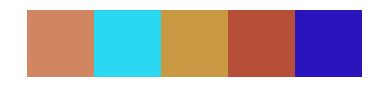

technology


E:\Users\ASUS\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


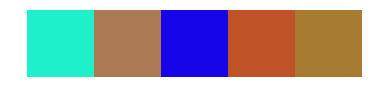

cute


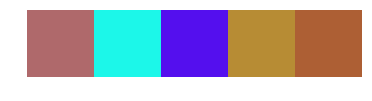

technology


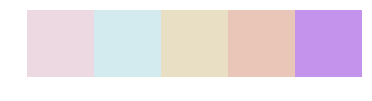

cute


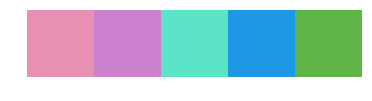

technology


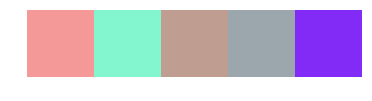

technology


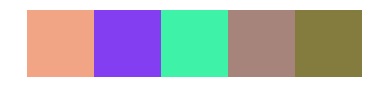

technology


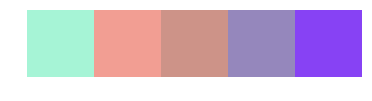

cute


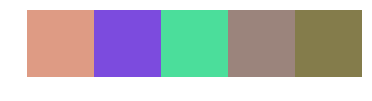

technology


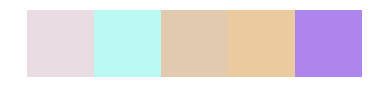

cute


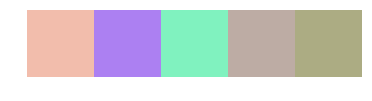

cute


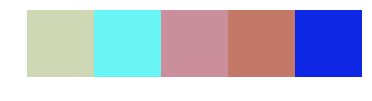

cute


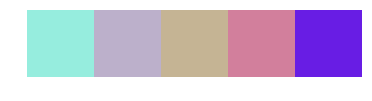

cute


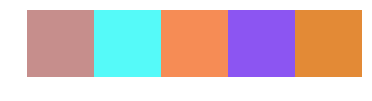

technology


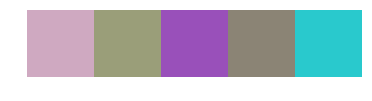

cute


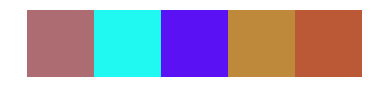

technology


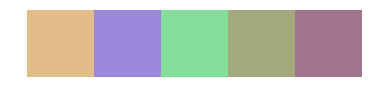

cute


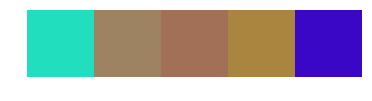

cute


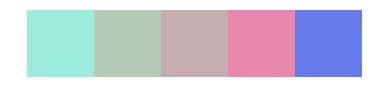

cute


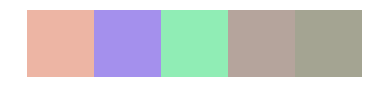

cute


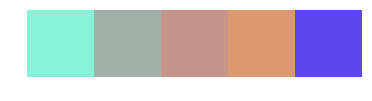

cute


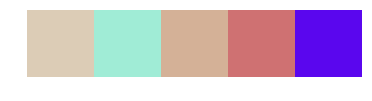

cute


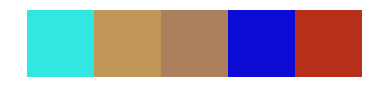

cute


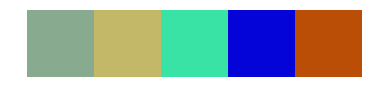

technology


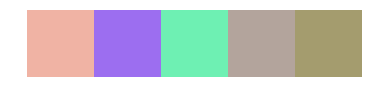

technology


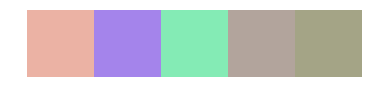

technology


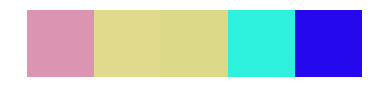

technology


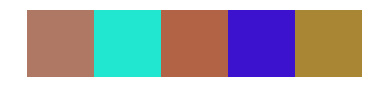

technology


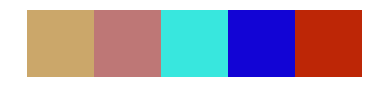

technology


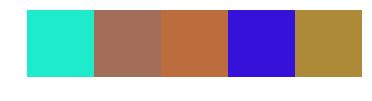

cute


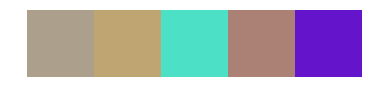

cute


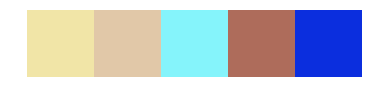

cute


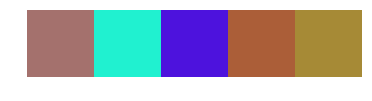

technology


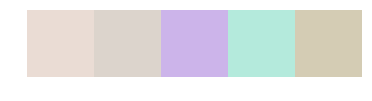

technology


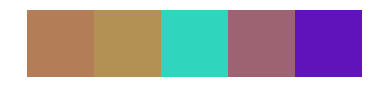

cute


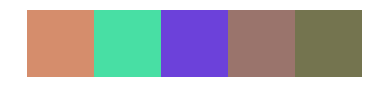

technology


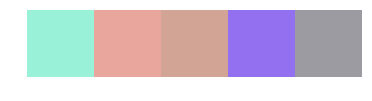

cute


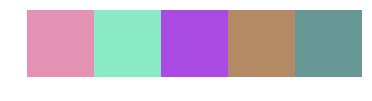

cute


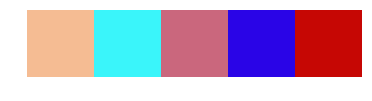

cute


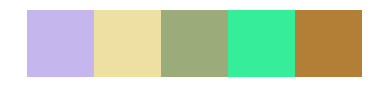

technology


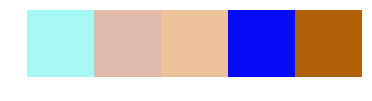

cute


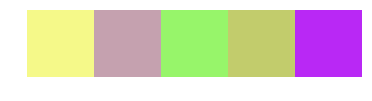

cute


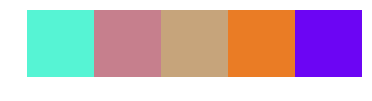

cute


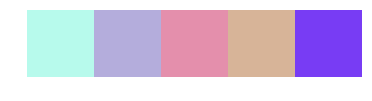

cute


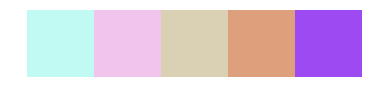

cute


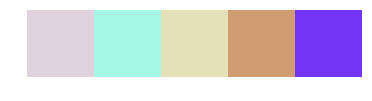

cute


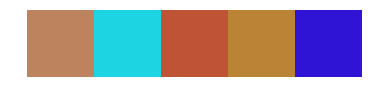

technology


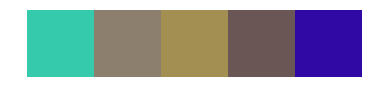

cute


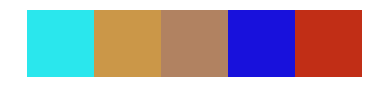

cute


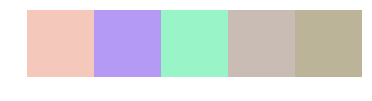

cute


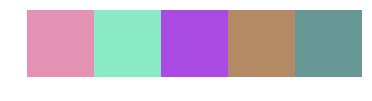

cute


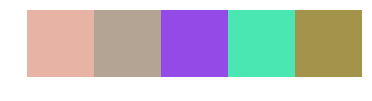

technology


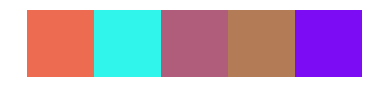

technology


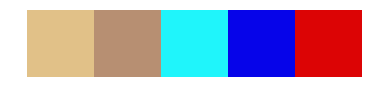

cute


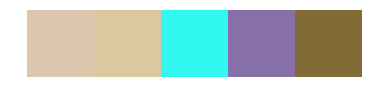

cute


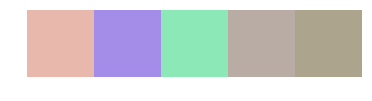

cute


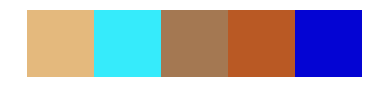

cute


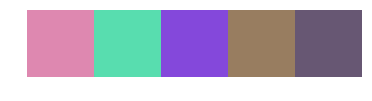

cute


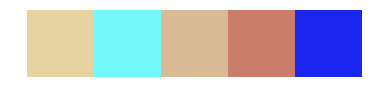

cute


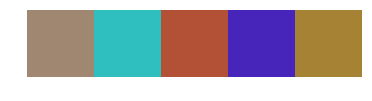

technology


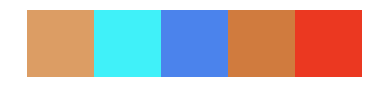

technology


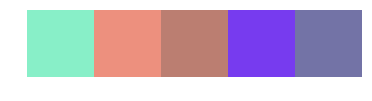

cute


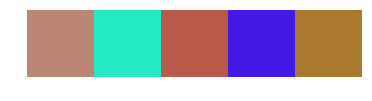

technology


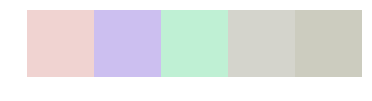

technology


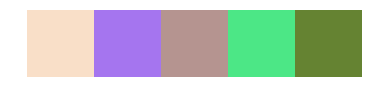

technology


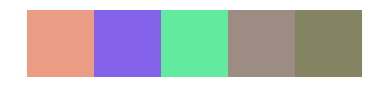

technology


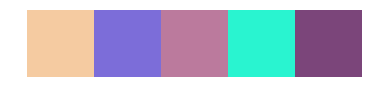

technology


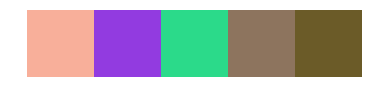

technology


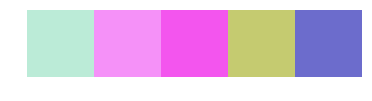

technology


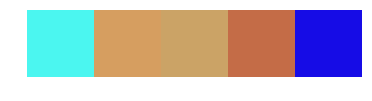

cute


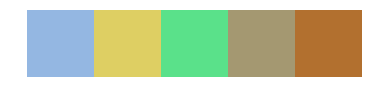

cute


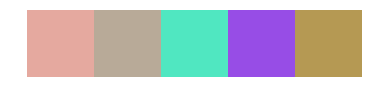

cute


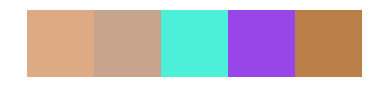

technology


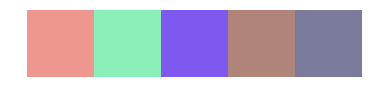

cute


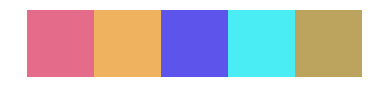

technology


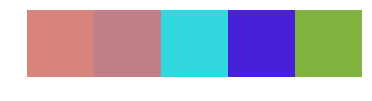

technology


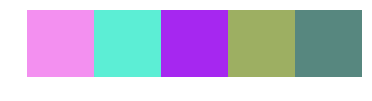

cute


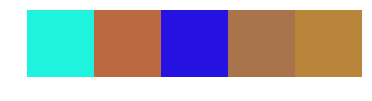

cute


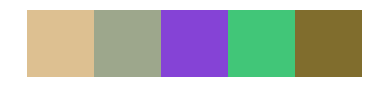

technology


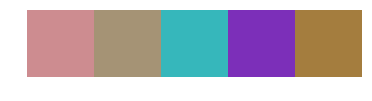

cute


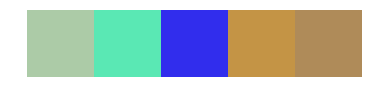

cute


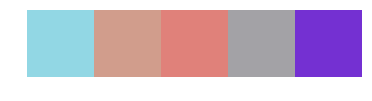

cute


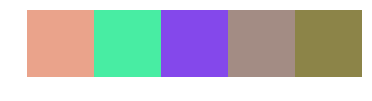

cute


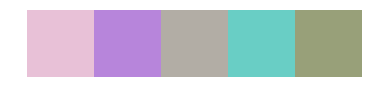

technology


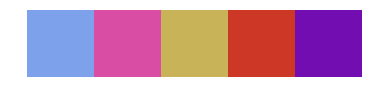

technology


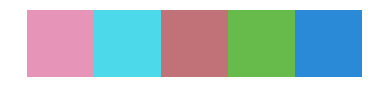

technology


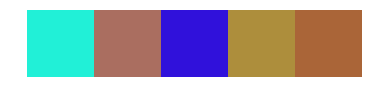

cute


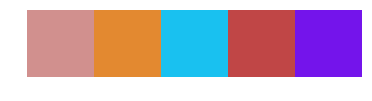

cute


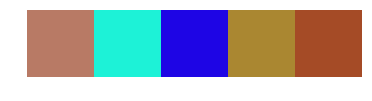

technology


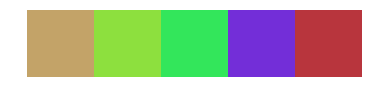

technology


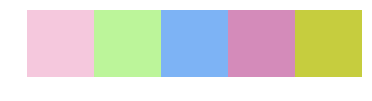

cute


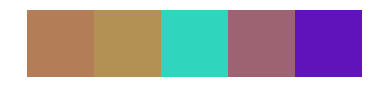

cute


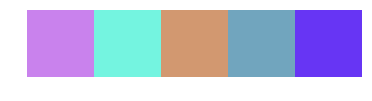

cute


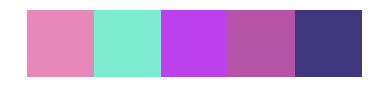

cute


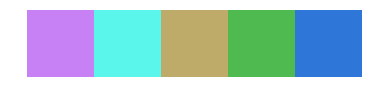

technology


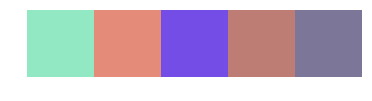

cute


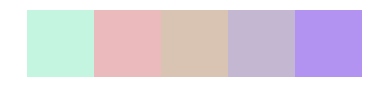

cute


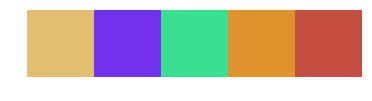

technology


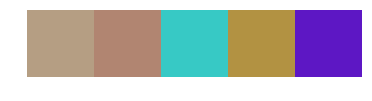

technology


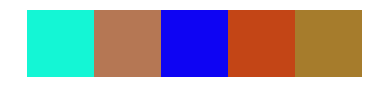

cute


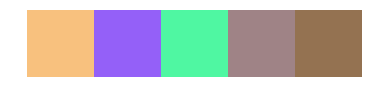

cute


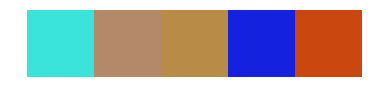

cute


In [26]:
for index, row in data.iterrows():
    c1=(row[0],row[1],row[2])
    c2=(row[3],row[4],row[5])
    c3=(row[6],row[7],row[8])
    c4=(row[9],row[10],row[11])
    c5=(row[12],row[13],row[14])
    palette=[c1,c2,c3,c4,c5]
    show(palette)
    print(style_predict(palette))
    if index > 100:
        break

In [24]:
data2 = data